In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
import tensorflow as tf

In [3]:
!pip install nltk
import nltk

# Read the CSV

In [4]:
data= pd.read_csv("mtsamples 4.csv", index_col=[0])
data

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [6]:
del data['keywords']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


In [8]:
data.isnull().sum()

description           0
medical_specialty     0
sample_name           0
transcription        33
dtype: int64

In [9]:
data= data.dropna(axis = 0, how ='any') 
data

,description,medical_specialty,sample_name,transcription
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...
...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e..."
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema..."
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen..."


In [10]:
data.isnull().sum()

description          0
medical_specialty    0
sample_name          0
transcription        0
dtype: int64

In [11]:
data['transcription']=data['transcription'].astype('str')
data['transcription']

<ipython-input-11-6d6bf1d728ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transcription']=data['transcription'].astype('str')


0       SUBJECTIVE:,  This 23-year-old white female pr...
1       PAST MEDICAL HISTORY:, He has difficulty climb...
2       HISTORY OF PRESENT ILLNESS: , I have seen ABC ...
3       2-D M-MODE: , ,1.  Left atrial enlargement wit...
4       1.  The left ventricular cavity size and wall ...
                              ...                        
4994    HISTORY:,  I had the pleasure of meeting and e...
4995    ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
4996    SUBJECTIVE: , This is a 42-year-old white fema...
4997    CHIEF COMPLAINT: , This 5-year-old male presen...
4998    HISTORY: , A 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [12]:
data['transcription'] = data['transcription'].str.lower()
data['transcription']

<ipython-input-12-c71ec3b748da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transcription'] = data['transcription'].str.lower()


0       subjective:,  this 23-year-old white female pr...
1       past medical history:, he has difficulty climb...
2       history of present illness: , i have seen abc ...
3       2-d m-mode: , ,1.  left atrial enlargement wit...
4       1.  the left ventricular cavity size and wall ...
                              ...                        
4994    history:,  i had the pleasure of meeting and e...
4995    admitting diagnosis: , kawasaki disease.,disch...
4996    subjective: , this is a 42-year-old white fema...
4997    chief complaint: , this 5-year-old male presen...
4998    history: , a 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [13]:
# data['transcription'].replace(['#'], [' '], regex=True)

In [14]:
#getting rid of targeted charachters in the trascription
chars = ['#',':,',': ,',';','$','!','?','*','``','1. ', '2. ', '3. ', '4. ', '5. ','6. ','7. ','8. ','9. ','10. ']
for c in chars:
    data['transcription']=data['transcription'] = data['transcription'].str.replace(c,"")

data

# chars = "\`*_{}[]()>#+-.,!$:;%'&/?"

<ipython-input-14-476ff111b9de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transcription']=data['transcription'] = data['transcription'].str.replace(c,"")


,description,medical_specialty,sample_name,transcription
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...
...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...


In [15]:
# data['transcription']=data['transcription'].replace(['#',':,',': ,',';','$'], [' ',' ',' ',' ',' '], regex=True)
# data['transcription']

In [16]:
# Tokenizing 
from nltk.tokenize import sent_tokenize, word_tokenize

data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)
data

<ipython-input-16-91e085ec52f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)


,description,medical_specialty,sample_name,transcription,tokenized_sents
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"[subjective, this, 23-year-old, white, female,..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"[history, of, present, illness, i, have, seen,..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","[2-d, m-mode, ,, left, atrial, enlargement, wi..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"[the, left, ventricular, cavity, size, and, wa..."
...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"[history, i, had, the, pleasure, of, meeting, ..."
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","[admitting, diagnosis, kawasaki, disease., ,, ..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"[subjective, this, is, a, 42-year-old, white, ..."
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"[chief, complaint, this, 5-year-old, male, pre..."


In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])
data

<ipython-input-17-b0021ea90920>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])


,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"[subjective, this, 23-year-old, white, female,...","[subjective, 23-year-old, white, female, prese..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"[past, medical, history, he, has, difficulty, ...","[past, medical, history, difficulty, climbing,..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"[history, of, present, illness, i, have, seen,...","[history, present, illness, seen, abc, today, ..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","[2-d, m-mode, ,, left, atrial, enlargement, wi...","[2-d, m-mode, ,, left, atrial, enlargement, le..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"[the, left, ventricular, cavity, size, and, wa...","[left, ventricular, cavity, size, wall, thickn..."
...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"[history, i, had, the, pleasure, of, meeting, ...","[history, pleasure, meeting, evaluating, patie..."
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","[admitting, diagnosis, kawasaki, disease., ,, ...","[admitting, diagnosis, kawasaki, disease., ,, ..."
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"[subjective, this, is, a, 42-year-old, white, ...","[subjective, 42-year-old, white, female, comes..."
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"[chief, complaint, this, 5-year-old, male, pre...","[chief, complaint, 5-year-old, male, presents,..."


In [18]:
data['tokenized_sents']=data['tokenized_sents'].astype('str')
data['tokenized_sents']

<ipython-input-18-2bc1ff080a1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized_sents']=data['tokenized_sents'].astype('str')


0       ['subjective', 'this', '23-year-old', 'white',...
1       ['past', 'medical', 'history', 'he', 'has', 'd...
2       ['history', 'of', 'present', 'illness', 'i', '...
3       ['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...
4       ['the', 'left', 'ventricular', 'cavity', 'size...
                              ...                        
4994    ['history', 'i', 'had', 'the', 'pleasure', 'of...
4995    ['admitting', 'diagnosis', 'kawasaki', 'diseas...
4996    ['subjective', 'this', 'is', 'a', '42-year-old...
4997    ['chief', 'complaint', 'this', '5-year-old', '...
4998    ['history', 'a', '34-year-old', 'male', 'prese...
Name: tokenized_sents, Length: 4966, dtype: object

In [19]:
data['tokens'] = data['tokenized_sents'].str.split().str.len()
data

<ipython-input-19-3865c44193e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = data['tokenized_sents'].str.split().str.len()


,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [20]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [21]:
data['medical_specialty'].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Dentistry                          27
 Cosmetic / Plastic Surge

In [22]:
data['medical_specialty'].nunique()

40

In [23]:
# columns_to_remove = [' Office Notes',  'SOAP / Chart / Progress Notes', 'Letters', 'IME-QME-Work Comp etc.','Hospice - Palliative Care',' Discharge Summary' ]

# med_specialties= data['medical_specialty']

# for column in med_specialties:
#     med_specialties != columns_to_remove

In [24]:
data = data[data['medical_specialty'] != ' Discharge Summary']
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [25]:
data = data[data['medical_specialty'] != ' Office Notes']
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [26]:
data = data[data['medical_specialty'] != ' SOAP / Chart / Progress Notes']
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [27]:
data = data[data['medical_specialty'] != ' Letters']
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [28]:
data = data[data['medical_specialty'] != ' IME-QME-Work Comp etc.']
data


,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [29]:
data = data[data['medical_specialty'] != ' Hospice - Palliative Care']
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [30]:
data = data[data['medical_specialty'] != ' Emergency Room Reports']

In [31]:
#Getting the mean and median across all tokens 
print(data['tokens'].mean())
print(data['tokens'].median())

533.516143299425
466.0


In [32]:
data['tokens'].value_counts().sample(50)

190      3
691      6
7        2
81       4
796      2
753      3
336      5
1215     1
229      4
836      4
482      6
301     15
580      2
838      4
29       2
326      2
97       1
706      5
1355     2
716      4
562      3
705      2
683      6
823      4
622      4
261      6
138      6
899      2
808      1
1234     2
324      7
1496     2
117      4
493      8
280      2
335      9
704      3
89       1
929      4
161      8
462      8
302      3
458     11
575      2
1515     2
902      2
430     12
35       2
196     12
597      4
Name: tokens, dtype: int64

In [33]:
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Pediatrics - Neonatal           70
 Pain Management                 61
 Psychiatry / Psychology         53
 Podiatry                        47
 Dermatology                     29
 Cosmetic / Plastic Surgery      27
 Dentistry                       27
 Physical Medicine - Rehab       21
 Sleep Medicine                  20
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Diets and Nutritions       

In [34]:
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,1088,539.303309,467.5
Consult - History and Phy.,516,654.213178,581.5
Cardiovascular / Pulmonary,371,492.738544,430.0
Orthopedic,355,626.357746,564.0
Radiology,273,317.948718,264.0
General Medicine,259,550.621622,501.0
Gastroenterology,224,408.906250,346.0
Neurology,223,573.479821,491.0
Urology,156,459.782051,398.0


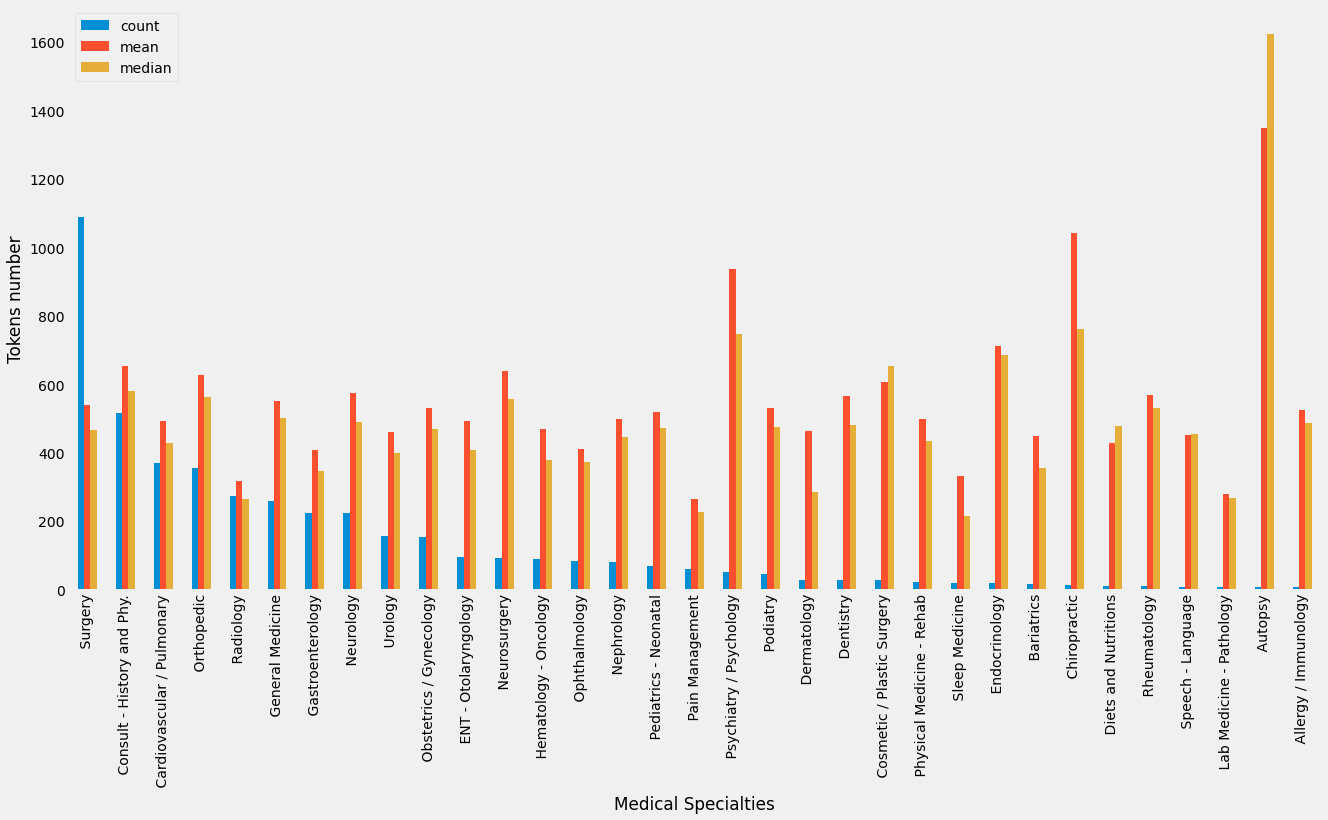

In [35]:
# A good snapshot: in our corpus there is a great number of texts for Surgery,but for practices like Psychiatry and 
#Immunology very few. Nonetheless, mean and median of tokes are high for those categories, which means that the corpora
#are long
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Tokens number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)

In [36]:
#Group sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
# # Combining similar offenses together
data = data.replace({' Sleep Medicine': " Sleep and Pain", ' Pain Management': " Sleep and Pain"})
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,subjective this 23-year-old white female pres...,"['subjective', 'this', '23-year-old', 'white',...","[subjective, 23-year-old, white, female, prese...",239
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode , left atrial enlargement with left...","['2-d', 'm-mode', ',', 'left', 'atrial', 'enla...","[2-d, m-mode, ,, left, atrial, enlargement, le...",80
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,the left ventricular cavity size and wall thi...,"['the', 'left', 'ventricular', 'cavity', 'size...","[left, ventricular, cavity, size, wall, thickn...",243
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [37]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' Sleep and Pain', ' Rheumatology', ' Radiology',
       ' Psychiatry / Psychology', ' Podiatry',
       ' Physical Medicine - Rehab', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Lab Medicine - Pathology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Endocrinology', ' Diets and Nutritions',
       ' Dermatology', ' Cosmetic / Plastic Surgery',
       ' Consult - History and Phy.', ' Chiropractic', ' Autopsy'],
      dtype=object)

In [38]:
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 Psychiatry / Psychology         53
 Podiatry                        47
 Dermatology                     29
 Dentistry                       27
 Cosmetic / Plastic Surgery      27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Diets and Nutritions            10
 Rheumatology               

In [39]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' Sleep and Pain', ' Rheumatology', ' Radiology',
       ' Psychiatry / Psychology', ' Podiatry',
       ' Physical Medicine - Rehab', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Lab Medicine - Pathology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Endocrinology', ' Diets and Nutritions',
       ' Dermatology', ' Cosmetic / Plastic Surgery',
       ' Consult - History and Phy.', ' Chiropractic', ' Autopsy'],
      dtype=object)

In [40]:
# # Combining similar offenses together
#Group sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
data = data.replace({' Cosmetic / Plastic Surgery': " SKIN cosmetics", ' Dermatology': " SKIN cosmetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Dentistry                       27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language          

In [41]:
data = data.replace({' Chiropractic': " Physical Therapy", ' Physical Medicine - Rehab': " Physical Therapy"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dentistry                       27
 Endocrinology                   19
 Bariatrics                      18
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language                9
 Autopsy                    

In [42]:
data = data.replace({' Bariatrics': " Dietetics", ' Diets and Nutritions': " Dietetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Sleep and Pain                  81
 Nephrology                      81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Autopsy                          8
 Lab Medicine - Pathology   

In [43]:
data = data.replace({' Neurology': " Neurologists", ' Neurosurgery': " Neurologists"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Neurologists                   317
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Autopsy                          8
 Lab Medicine - Pathology         8
 Allergy / Immunology       

In [44]:
# Final count of medical specialties (for now)
data = data.replace({' Lab Medicine - Pathology': " Pathology"})
data['medical_specialty'].nunique()

28

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4522 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4522 non-null   object
 1   medical_specialty  4522 non-null   object
 2   sample_name        4522 non-null   object
 3   transcription      4522 non-null   object
 4   tokenized_sents    4522 non-null   object
 5   post_stopwords     4522 non-null   object
 6   tokens             4522 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 442.6+ KB


In [46]:
#Setting a cutoff lowerbound (250 tokens) and upperbound (1000) for the number of tokens
data= data[(data['tokens'] >= 250) & (data['tokens'] <= 1000)]
print(data['tokens'].min())
print(data['tokens'].max())

250
1000


In [47]:
data['medical_specialty'].nunique()

28

In [48]:
data['medical_specialty'].value_counts()

 Surgery                       786
 Consult - History and Phy.    403
 Orthopedic                    250
 Cardiovascular / Pulmonary    239
 Neurologists                  227
 General Medicine              202
 Gastroenterology              146
 Radiology                     139
 Obstetrics / Gynecology       111
 Urology                       104
 ENT - Otolaryngology           67
 Hematology - Oncology          62
 Ophthalmology                  61
 Pediatrics - Neonatal          59
 Nephrology                     57
 SKIN cosmetics                 44
 Sleep and Pain                 33
 Psychiatry / Psychology        31
 Podiatry                       28
 Dentistry                      26
 Physical Therapy               22
 Dietetics                      22
 Endocrinology                  15
 Rheumatology                    9
 Speech - Language               7
 Allergy / Immunology            5
 Pathology                       5
 Autopsy                         1
Name: medical_specia

In [49]:
data = data[data['medical_specialty'] != ' Autopsy']
data

,description,medical_specialty,sample_name,transcription,tokenized_sents,post_stopwords,tokens
1,Consult for laparoscopic gastric bypass.,Dietetics,Laparoscopic Gastric Bypass Consult - 2,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Dietetics,Laparoscopic Gastric Bypass Consult - 1,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
5,Morbid obesity. Laparoscopic antecolic anteg...,Dietetics,Laparoscopic Gastric Bypass,"preoperative diagnosis morbid obesity.,postope...","['preoperative', 'diagnosis', 'morbid', 'obesi...","[preoperative, diagnosis, morbid, obesity., ,,...",801
6,"Liposuction of the supraumbilical abdomen, re...",Dietetics,Liposuction,"preoperative diagnoses deformity, right breast...","['preoperative', 'diagnoses', 'deformity', ','...","[preoperative, diagnoses, deformity, ,, right,...",671
8,Suction-assisted lipectomy - lipodystrophy of...,Dietetics,Lipectomy - Abdomen/Thighs,preoperative diagnosis lipodystrophy of the ab...,"['preoperative', 'diagnosis', 'lipodystrophy',...","[preoperative, diagnosis, lipodystrophy, abdom...",267
...,...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [50]:
data['medical_specialty'].value_counts()

 Surgery                       786
 Consult - History and Phy.    403
 Orthopedic                    250
 Cardiovascular / Pulmonary    239
 Neurologists                  227
 General Medicine              202
 Gastroenterology              146
 Radiology                     139
 Obstetrics / Gynecology       111
 Urology                       104
 ENT - Otolaryngology           67
 Hematology - Oncology          62
 Ophthalmology                  61
 Pediatrics - Neonatal          59
 Nephrology                     57
 SKIN cosmetics                 44
 Sleep and Pain                 33
 Psychiatry / Psychology        31
 Podiatry                       28
 Dentistry                      26
 Dietetics                      22
 Physical Therapy               22
 Endocrinology                  15
 Rheumatology                    9
 Speech - Language               7
 Pathology                       5
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [51]:
print(data['tokens'].min())
print(data['tokens'].max())

250
1000


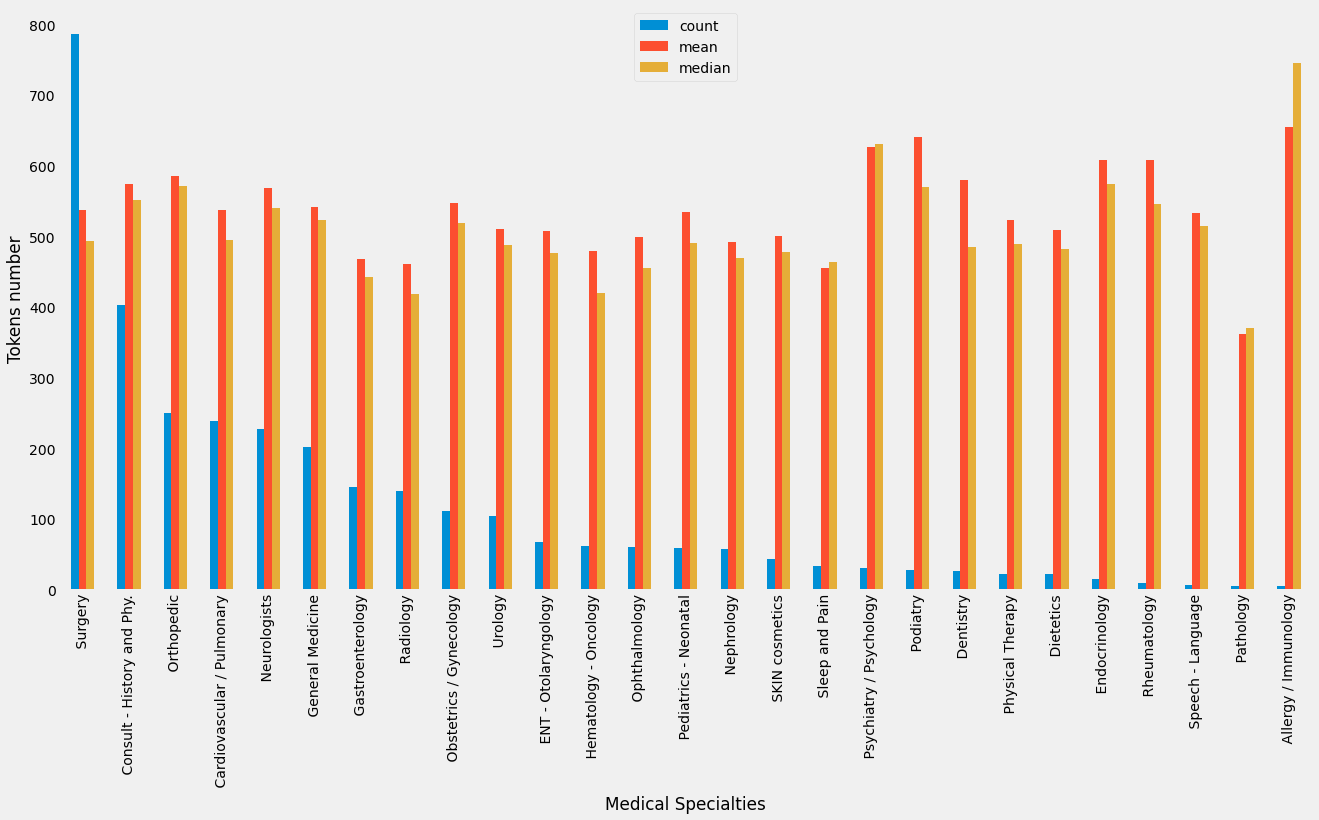

In [52]:
# Cleaned snapshot
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Tokens number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)
plt.savefig('Corpus view')

In [53]:
data.groupby('medical_specialty')['tokens'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


,count,mean,median
medical_specialty,,,
Surgery,786,537.576336,493.0
Consult - History and Phy.,403,574.253102,552.0
Orthopedic,250,585.252000,571.0
Cardiovascular / Pulmonary,239,537.619247,495.0
Neurologists,227,568.378855,540.0
General Medicine,202,541.148515,522.5
Gastroenterology,146,468.068493,442.5
Radiology,139,460.906475,418.0
Obstetrics / Gynecology,111,547.648649,519.0


In [54]:
del data['sample_name']

In [55]:
data

,description,medical_specialty,transcription,tokenized_sents,post_stopwords,tokens
1,Consult for laparoscopic gastric bypass.,Dietetics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439
2,Consult for laparoscopic gastric bypass.,Dietetics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860
5,Morbid obesity. Laparoscopic antecolic anteg...,Dietetics,"preoperative diagnosis morbid obesity.,postope...","['preoperative', 'diagnosis', 'morbid', 'obesi...","[preoperative, diagnosis, morbid, obesity., ,,...",801
6,"Liposuction of the supraumbilical abdomen, re...",Dietetics,"preoperative diagnoses deformity, right breast...","['preoperative', 'diagnoses', 'deformity', ','...","[preoperative, diagnoses, deformity, ,, right,...",671
8,Suction-assisted lipectomy - lipodystrophy of...,Dietetics,preoperative diagnosis lipodystrophy of the ab...,"['preoperative', 'diagnosis', 'lipodystrophy',...","[preoperative, diagnosis, lipodystrophy, abdom...",267
...,...,...,...,...,...,...
4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913
4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301
4996,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830
4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487


In [56]:
from collections import Counter
data["post_stopwords"].transform(lambda x: Counter(x)).sum()

Counter({'past': 1709,
         'medical': 1372,
         'history': 6275,
         'difficulty': 799,
         'climbing': 11,
         'stairs': 36,
         ',': 102521,
         'airline': 4,
         'seats': 4,
         'tying': 28,
         'shoes': 10,
         'used': 2361,
         'public': 13,
         'seating': 7,
         'lifting': 52,
         'objects': 49,
         'floor': 170,
         '.': 82712,
         'exercises': 43,
         'three': 639,
         'times': 454,
         'week': 497,
         'home': 677,
         'cardio': 11,
         'walking': 144,
         'two': 1423,
         'blocks': 17,
         'five': 216,
         'flights': 2,
         'snoring': 43,
         'muscle': 959,
         'joint': 750,
         'pains': 49,
         'including': 684,
         'knee': 721,
         'pain': 3156,
         'back': 1587,
         'foot': 586,
         'ankle': 378,
         'swelling': 398,
         'gastroesophageal': 90,
         'reflux': 155,
        

In [57]:
import sys
sys.setrecursionlimit(10000)

In [58]:
# # #stemming 
# from nltk.stem.snowball import SnowballStemmer

# # Use English stemmer.
# stemmer = SnowballStemmer("english")


# # data=data['Stemmed_column']=data['post_stopwords'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
# # data

# data=data['stemmed'] = data['post_stopwords'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
# data



In [59]:
from nltk.stem.wordnet import WordNetLemmatizer

lmtzr = WordNetLemmatizer()
data['lemmatize'] = data['post_stopwords'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])

print(data['lemmatize'])

1       [past, medical, history, difficulty, climbing,...
2       [history, present, illness, seen, abc, today, ...
5       [preoperative, diagnosis, morbid, obesity., ,,...
6       [preoperative, diagnosis, deformity, ,, right,...
8       [preoperative, diagnosis, lipodystrophy, abdom...
                              ...                        
4994    [history, pleasure, meeting, evaluating, patie...
4995    [admitting, diagnosis, kawasaki, disease., ,, ...
4996    [subjective, 42-year-old, white, female, come,...
4997    [chief, complaint, 5-year-old, male, present, ...
4998    [history, 34-year-old, male, present, today, s...
Name: lemmatize, Length: 3160, dtype: object


In [60]:
data=data.reset_index(drop=True)
data

,description,medical_specialty,transcription,tokenized_sents,post_stopwords,tokens,lemmatize
0,Consult for laparoscopic gastric bypass.,Dietetics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439,"[past, medical, history, difficulty, climbing,..."
1,Consult for laparoscopic gastric bypass.,Dietetics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860,"[history, present, illness, seen, abc, today, ..."
2,Morbid obesity. Laparoscopic antecolic anteg...,Dietetics,"preoperative diagnosis morbid obesity.,postope...","['preoperative', 'diagnosis', 'morbid', 'obesi...","[preoperative, diagnosis, morbid, obesity., ,,...",801,"[preoperative, diagnosis, morbid, obesity., ,,..."
3,"Liposuction of the supraumbilical abdomen, re...",Dietetics,"preoperative diagnoses deformity, right breast...","['preoperative', 'diagnoses', 'deformity', ','...","[preoperative, diagnoses, deformity, ,, right,...",671,"[preoperative, diagnosis, deformity, ,, right,..."
4,Suction-assisted lipectomy - lipodystrophy of...,Dietetics,preoperative diagnosis lipodystrophy of the ab...,"['preoperative', 'diagnosis', 'lipodystrophy',...","[preoperative, diagnosis, lipodystrophy, abdom...",267,"[preoperative, diagnosis, lipodystrophy, abdom..."
...,...,...,...,...,...,...,...
3155,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913,"[history, pleasure, meeting, evaluating, patie..."
3156,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301,"[admitting, diagnosis, kawasaki, disease., ,, ..."
3157,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830,"[subjective, 42-year-old, white, female, come,..."
3158,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487,"[chief, complaint, 5-year-old, male, present, ..."


In [61]:
data['lemmatize']= data['lemmatize'].astype('str')

In [62]:
from nltk import pos_tag_sents

data['POSTags'] = pos_tag_sents(data['lemmatize'].apply(word_tokenize).tolist())
                                                  
# data['lemmatize'] = data['post_stopwords'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])

In [63]:
data

,description,medical_specialty,transcription,tokenized_sents,post_stopwords,tokens,lemmatize,POSTags
0,Consult for laparoscopic gastric bypass.,Dietetics,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439,"['past', 'medical', 'history', 'difficulty', '...","[([, JJ), ('past, NNP), (', POS), (,, ,), ('me..."
1,Consult for laparoscopic gastric bypass.,Dietetics,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860,"['history', 'present', 'illness', 'seen', 'abc...","[([, JJ), ('history, NN), (', ''), (,, ,), ('p..."
2,Morbid obesity. Laparoscopic antecolic anteg...,Dietetics,"preoperative diagnosis morbid obesity.,postope...","['preoperative', 'diagnosis', 'morbid', 'obesi...","[preoperative, diagnosis, morbid, obesity., ,,...",801,"['preoperative', 'diagnosis', 'morbid', 'obesi...","[([, RB), ('preoperative, JJ), (', ''), (,, ,)..."
3,"Liposuction of the supraumbilical abdomen, re...",Dietetics,"preoperative diagnoses deformity, right breast...","['preoperative', 'diagnoses', 'deformity', ','...","[preoperative, diagnoses, deformity, ,, right,...",671,"['preoperative', 'diagnosis', 'deformity', ','...","[([, RB), ('preoperative, JJ), (', ''), (,, ,)..."
4,Suction-assisted lipectomy - lipodystrophy of...,Dietetics,preoperative diagnosis lipodystrophy of the ab...,"['preoperative', 'diagnosis', 'lipodystrophy',...","[preoperative, diagnosis, lipodystrophy, abdom...",267,"['preoperative', 'diagnosis', 'lipodystrophy',...","[([, RB), ('preoperative, JJ), (', ''), (,, ,)..."
...,...,...,...,...,...,...,...,...
3155,Patient having severe sinusitis about two to ...,Allergy / Immunology,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913,"['history', 'pleasure', 'meeting', 'evaluating...","[([, JJ), ('history, NN), (', ''), (,, ,), ('p..."
3156,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[([, RB), ('admitting, VBG), (', ''), (,, ,), ..."
3157,A female for a complete physical and follow u...,Allergy / Immunology,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830,"['subjective', '42-year-old', 'white', 'female...","[([, RB), ('subjective, JJ), (', ''), (,, ,), ..."
3158,Mother states he has been wheezing and coughing.,Allergy / Immunology,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487,"['chief', 'complaint', '5-year-old', 'male', '...","[([, JJ), ('chief, NN), (', ''), (,, ,), ('com..."


In [65]:
print(data['POSTags'])

0       [([, JJ), ('past, NNP), (', POS), (,, ,), ('me...
1       [([, JJ), ('history, NN), (', ''), (,, ,), ('p...
2       [([, RB), ('preoperative, JJ), (', ''), (,, ,)...
3       [([, RB), ('preoperative, JJ), (', ''), (,, ,)...
4       [([, RB), ('preoperative, JJ), (', ''), (,, ,)...
                              ...                        
3155    [([, JJ), ('history, NN), (', ''), (,, ,), ('p...
3156    [([, RB), ('admitting, VBG), (', ''), (,, ,), ...
3157    [([, RB), ('subjective, JJ), (', ''), (,, ,), ...
3158    [([, JJ), ('chief, NN), (', ''), (,, ,), ('com...
3159    [([, JJ), ('history, NN), (', ''), (,, ,), ('3...
Name: POSTags, Length: 3160, dtype: object


In [66]:
# Here are the 5 steps to create a chatbot in Python from scratch:

# Import and load the data file
# Preprocess data
# Create training and testing data
# Build the model
# Predict the response

In [67]:
#Creating the label 

#first thing to do is to separate out the label from the numerical dataframe
X = data.drop("medical_specialty", axis=1)
y = data["medical_specialty"]
#Imput is the X dataset. 
print(X.shape, y.shape)

(3160, 7) (3160,)


In [68]:
X

,description,transcription,tokenized_sents,post_stopwords,tokens,lemmatize,POSTags
0,Consult for laparoscopic gastric bypass.,past medical history he has difficulty climbin...,"['past', 'medical', 'history', 'he', 'has', 'd...","[past, medical, history, difficulty, climbing,...",439,"['past', 'medical', 'history', 'difficulty', '...","[([, JJ), ('past, NNP), (', POS), (,, ,), ('me..."
1,Consult for laparoscopic gastric bypass.,history of present illness i have seen abc tod...,"['history', 'of', 'present', 'illness', 'i', '...","[history, present, illness, seen, abc, today, ...",860,"['history', 'present', 'illness', 'seen', 'abc...","[([, JJ), ('history, NN), (', ''), (,, ,), ('p..."
2,Morbid obesity. Laparoscopic antecolic anteg...,"preoperative diagnosis morbid obesity.,postope...","['preoperative', 'diagnosis', 'morbid', 'obesi...","[preoperative, diagnosis, morbid, obesity., ,,...",801,"['preoperative', 'diagnosis', 'morbid', 'obesi...","[([, RB), ('preoperative, JJ), (', ''), (,, ,)..."
3,"Liposuction of the supraumbilical abdomen, re...","preoperative diagnoses deformity, right breast...","['preoperative', 'diagnoses', 'deformity', ','...","[preoperative, diagnoses, deformity, ,, right,...",671,"['preoperative', 'diagnosis', 'deformity', ','...","[([, RB), ('preoperative, JJ), (', ''), (,, ,)..."
4,Suction-assisted lipectomy - lipodystrophy of...,preoperative diagnosis lipodystrophy of the ab...,"['preoperative', 'diagnosis', 'lipodystrophy',...","[preoperative, diagnosis, lipodystrophy, abdom...",267,"['preoperative', 'diagnosis', 'lipodystrophy',...","[([, RB), ('preoperative, JJ), (', ''), (,, ,)..."
...,...,...,...,...,...,...,...
3155,Patient having severe sinusitis about two to ...,history i had the pleasure of meeting and eva...,"['history', 'i', 'had', 'the', 'pleasure', 'of...","[history, pleasure, meeting, evaluating, patie...",913,"['history', 'pleasure', 'meeting', 'evaluating...","[([, JJ), ('history, NN), (', ''), (,, ,), ('p..."
3156,This is a 14-month-old baby boy Caucasian who...,"admitting diagnosis kawasaki disease.,discharg...","['admitting', 'diagnosis', 'kawasaki', 'diseas...","[admitting, diagnosis, kawasaki, disease., ,, ...",301,"['admitting', 'diagnosis', 'kawasaki', 'diseas...","[([, RB), ('admitting, VBG), (', ''), (,, ,), ..."
3157,A female for a complete physical and follow u...,subjective this is a 42-year-old white female ...,"['subjective', 'this', 'is', 'a', '42-year-old...","[subjective, 42-year-old, white, female, comes...",830,"['subjective', '42-year-old', 'white', 'female...","[([, RB), ('subjective, JJ), (', ''), (,, ,), ..."
3158,Mother states he has been wheezing and coughing.,chief complaint this 5-year-old male presents ...,"['chief', 'complaint', 'this', '5-year-old', '...","[chief, complaint, 5-year-old, male, presents,...",487,"['chief', 'complaint', '5-year-old', 'male', '...","[([, JJ), ('chief, NN), (', ''), (,, ,), ('com..."


In [69]:
y

0                   Dietetics
1                   Dietetics
2                   Dietetics
3                   Dietetics
4                   Dietetics
                ...          
3155     Allergy / Immunology
3156     Allergy / Immunology
3157     Allergy / Immunology
3158     Allergy / Immunology
3159     Allergy / Immunology
Name: medical_specialty, Length: 3160, dtype: object

In [70]:
# Import the necessaried dependecies 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [71]:
# Use train_test_split to create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [72]:
#It is really important to scale our data before using multilayer perceptron models. Using MinMaxscaler (or StandardScaler)in this case
#Without scaling, it is often difficult for the training cycle to converge. 

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

ValueError: could not convert string to float: ' Painful enlarged navicula, right foot.  Osteochondroma of right fifth metatarsal. Partial tarsectomy navicula and partial metatarsectomy, right foot.'

In [73]:
#Remember to scale both the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

NameError: name 'X_scaler' is not defined

In [74]:
X_train_scaled

NameError: name 'X_train_scaled' is not defined

In [75]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [76]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)


In [77]:
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

ValueError: could not convert string to float: ' Painful enlarged navicula, right foot.  Osteochondroma of right fifth metatarsal. Partial tarsectomy navicula and partial metatarsectomy, right foot.'

In [80]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

ValueError: could not convert string to float: ' Painful enlarged navicula, right foot.  Osteochondroma of right fifth metatarsal. Partial tarsectomy navicula and partial metatarsectomy, right foot.'